In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


In [2]:
c

Client Scheduler: tcp://127.0.0.1:45704 Dashboard: http://127.0.0.1:36076/status,Cluster Workers: 8 Cores: 48 Memory: 134.91 GB


In [3]:
import xarray as xr 
import dask 
import numpy as np 
import os 
import time 
import glob
from datetime import date
import numpy.ma as ma
import matplotlib.pyplot as plt

today=date.today()


#https://pmall.univ-grenoble-alpes.fr/docs/auto_examples_code/windrose/windrose-exemple.html

In [4]:
Date_sept=['20120901','20120902','20120903','20120904','20120905','20120906','20120907','20120908','20120909','20120910','20120911','20120912','20120913','20120914','20120915','20120916','20120917','20120918','20120919','20120920','20120921','20120922','20120923','20120924','20120925','20120926','20120927','20120928','20120929','20120930']
Date_march=['20130301','20130302','20130303','20130304','20130305','20130306','20130307','20130308','20130309','20130310','20130311','20130312','20130313','20130314','20130315','20130316','20130317','20130318','20130319','20130320','20130321','20130322','20130323','20130324','20130325','20130326','20130327','20130328','20130329','20130330']
Date_month={'march':Date_march,'sept':Date_sept}

In [5]:
def get_mag_angle(box,month):
    print('get mag and angle for box '+str(box)+' and month '+str(month))
    Date=Date_month[month]
    datasets_mag = []
    datasets_tu = []
    for date in Date:
        zmag_file = '/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_magR_'+str(date)+'.1d_'+str(box)+'.nc'
        ztu_file='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_Tu_'+str(date)+'.1d_'+str(box)+'.nc'
        zdsmag=xr.open_dataset(zmag_file)
        zdstu=xr.open_dataset(ztu_file)
        datasets_mag.append(zdsmag)
        datasets_tu.append(zdstu)
    all_mag=xr.concat(datasets_mag,dim='z')
    all_tu=xr.concat(datasets_tu,dim='z')
    magR=all_mag['magR']
    Tu=all_tu['Tu']
    return magR,Tu
   
    
    

In [10]:
magR_sept_AC,Tu_sept_AC=get_mag_angle('AC','sept')
magR_march_AC,Tu_march_AC=get_mag_angle('AC','march')
magR_sept_GS,Tu_sept_GS=get_mag_angle('GS','sept')
magR_march_GS,Tu_march_GS=get_mag_angle('GS','march')
magR_sept_NE,Tu_sept_NE=get_mag_angle('NE','sept')
magR_march_NE,Tu_march_NE=get_mag_angle('NE','march')


get mag and angle for box AC and month sept
get mag and angle for box AC and month march
get mag and angle for box GS and month sept
get mag and angle for box GS and month march
get mag and angle for box NE and month sept
get mag and angle for box NE and month march


In [7]:
def sectors_for_windrose(magR,Tu,nb_angle,nb_ratio):
    
    C = np.zeros([nb_ratio,nb_angle])
    
    theta = np.linspace(0,np.pi/2,nb_angle)
    r = np.linspace(0,2.5,nb_ratio)

  
    Theta, R = np.meshgrid(theta, r)
    
    def density(tumin,tumax,rmin,rmax):
        return len(np.where( (tumin<Tu.values) * (Tu.values<tumax) * (rmin<magR.values) * (magR.values<rmax)  )[0])/ len(magR)
   
    for j in np.arange(nb_angle-1):
        for i in np.arange(nb_ratio-1):
            tumin=theta[j]
            tumax=theta[j+1]
            rmin=r[i]
            rmax=r[i+1]
            C[i,j]=density(tumin,tumax,rmin,rmax)
#            print('i = '+str(i)+' j = '+str(j)+' tumin = '+str(tumin)+' tumax = '+str(tumax)+' rmin = '+str(rmin)+' rmax = '+str(rmax))
        C[nb_ratio-1,j]=density(tumin,tumax,rmin,np.inf)
        
    return Theta, R, C
        


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


Text(0.5, 1.05, 'Joint PDF of gradient ratio and turner angle in box NE in march')

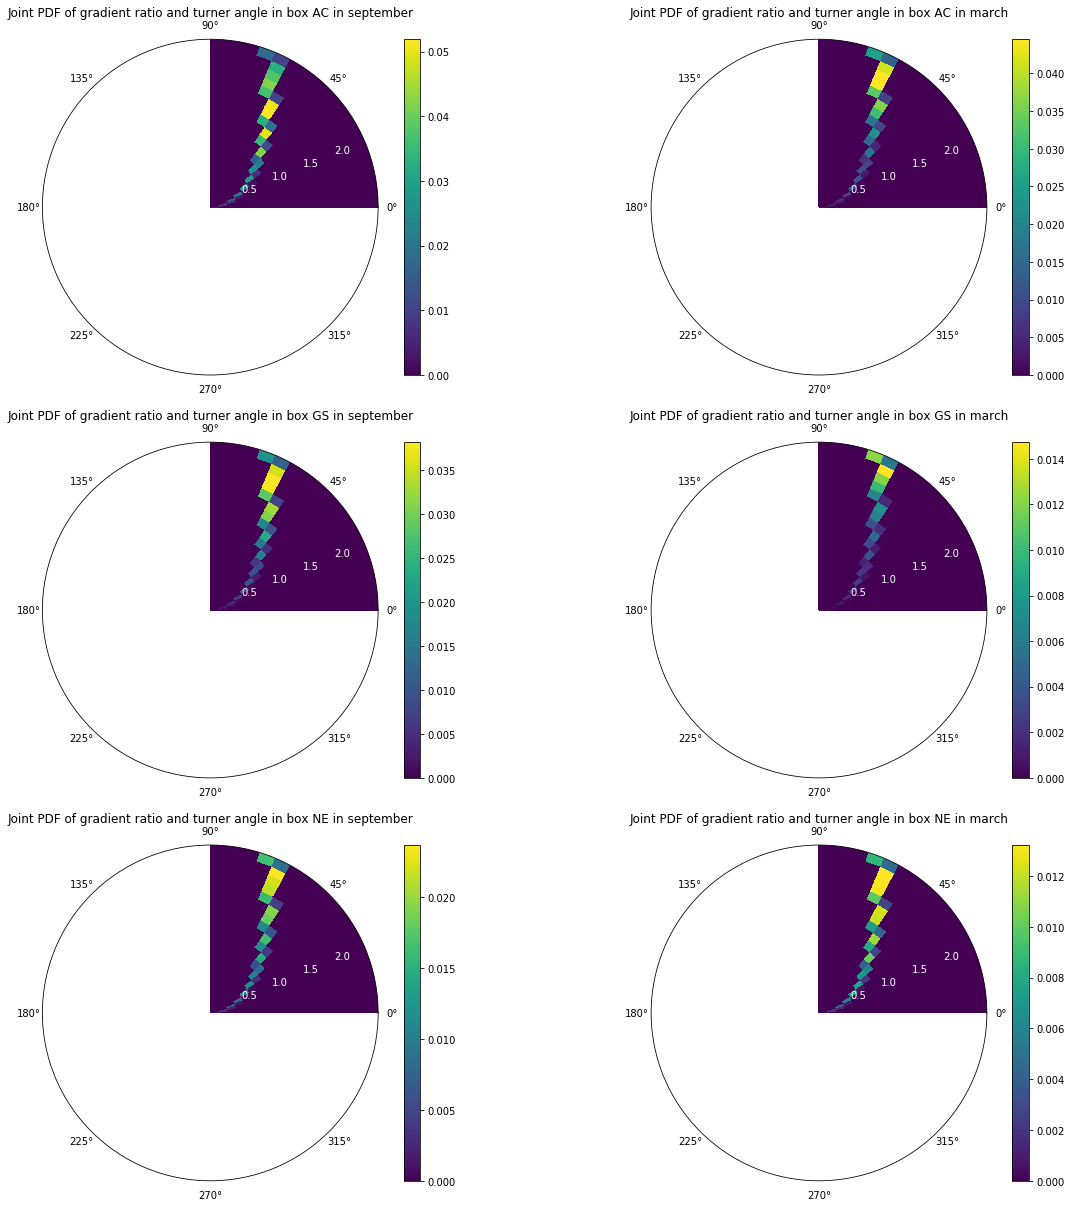

In [11]:
Theta_sept_AC, R_sept_AC, C_sept_AC= sectors_for_windrose(magR_sept_AC,Tu_sept_AC,17,20)
Theta_march_AC, R_march_AC, C_march_AC= sectors_for_windrose(magR_march_AC,Tu_march_AC,17,20)
Theta_sept_GS, R_sept_GS, C_sept_GS= sectors_for_windrose(magR_sept_GS,Tu_sept_GS,17,20)
Theta_march_GS, R_march_GS, C_march_GS= sectors_for_windrose(magR_march_GS,Tu_march_GS,17,20)
Theta_sept_NE, R_sept_NE, C_sept_NE= sectors_for_windrose(magR_sept_NE,Tu_sept_NE,17,20)
Theta_march_NE, R_march_NE, C_march_NE= sectors_for_windrose(magR_march_NE,Tu_march_NE,17,20)

fig = plt.figure(figsize=(20, 21))

ax = fig.add_subplot(321, projection='polar')
pcolor=ax.pcolormesh(Theta_sept_AC, R_sept_AC, C_sept_AC)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box AC in september')

ax = fig.add_subplot(322, projection='polar')
pcolor=ax.pcolormesh(Theta_march_AC, R_march_AC, C_march_AC)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box AC in march')

ax = fig.add_subplot(323, projection='polar')
pcolor=ax.pcolormesh(Theta_sept_GS, R_sept_GS, C_sept_GS)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box GS in september')

ax = fig.add_subplot(324, projection='polar')
pcolor=ax.pcolormesh(Theta_march_GS, R_march_GS, C_march_GS)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box GS in march')

ax = fig.add_subplot(325, projection='polar')
pcolor=ax.pcolormesh(Theta_sept_NE, R_sept_NE, C_sept_NE)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box NE in september')

ax = fig.add_subplot(326, projection='polar')
pcolor=ax.pcolormesh(Theta_march_NE, R_march_NE, C_march_NE)
plt.setp(ax.get_yticklabels(), color="w")
ax.tick_params(axis='y',colors="w")
plt.colorbar(pcolor)
plt.title('Joint PDF of gradient ratio and turner angle in box NE in march')
